# MSDS 430 Module 5 Python Assignment  

<div class="alert alert-block alert-warning"><b>In this assignment you will read through the notebook and complete the exercises. Once you are satisfied with the results, submit your notebook and html file to Canvas. Your files should include all output, i.e. run each cell and save your file before submitting.</b></div>

<div class="alert alert-block alert-info"> 

### Research project problem statement:  
    
There are world happiness surveys conducted every year for many countries around the world. Happiness is measured on such subjective topics as social support, freedom, generosity, corruption, government trust, positive and negative affects.
<br>
    
This study will look at the happiness measures over multiple years to determine which of the measures are related to the overall happiness of a country.  And we will look at population of a country to see if this has any relationship to the happiness measures. Are larger countries based on population happier than smaller countries?
<br>

### Objectives for cleaning and prepping the data:

- Read the happiness data and population data into dataframes.
- Use the methods `info, head, tail, shape` to inspect the data in the dataframes
- Use the method `describe` to obtain some statistics for the numerical data
- Create boxplots to check for outliers
- Drop null values, drop/select columns, select rows, and rename column names
- Use the method `value_counts` to obtain counts of unique rows in a dataframe
- Create sub-dataframes by selecting subset of rows and columns
- Convert dataframes from wide to long formats
- Merge the happiness and population dataframes
</div>

### References:

__[World Happiness Report Apendices and Data](https://worldhappiness.report/ed/2022/#appendices-and-data)__

How the indices are calculated for each country: __[World Happiness Report FAQ](https://worldhappiness.report/faq/)__

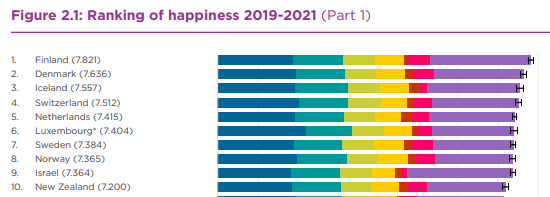

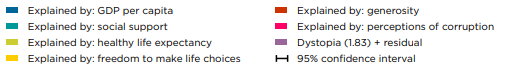

## Part I - Happiness measures

<i>Below is an example of a table created using HTML. This table explains what each of the happiness variables represents.  Check out the code in this Markdown cell to see how to create the table.  This format is perfect for a data dictionary which you will be doing in your EDA 2 homework.</i><br>

| Measure Name | Description | Source |
| --- | --- | --- |
| GDP per capita | Log of purchasing power parity adjusted to constant 2017 international dollars | World Bank |
| Healthy life expectancy | Life expectancy from birth | World Health Organization |
| Social Support | Subjective response to 'if you were in trouble, do you have relatives or friends to count on...' | Gallup World Poll |
| Freedom | Subjective response to 'Are you satisfied or dissatisfied with your freedom to choose what to do with your life' | Gallop World Poll |
| Generosity | Subjective response to Donating money to charity as relates to GDP per capita | Gallop World Poll |
| Perception of corruption | Subjective response about corruption as it relates to government and to businesses | Gallop World Poll |
| Positive affect | Subjective response to previous day experience of laughter, enjoyment or learn/do something interesting yesterday. | Gallop World Poll |
| Negative affect | Subjective response to previous day experience of worry, sadness, anger. | Gallop World Poll |
| Life ladder | Subjective rating of current life based on the mental image of a ladder with 10 being the highest and 0 for the low | Gallop World Poll |

<div class="alert alert-block alert-danger"><b>Reminder: In all of the problems you will see <font color=black>#TODO</font> statements added as comments on the code cell provided. You will want to be sure to complete each of these as indicated to avoid losing points.</b></div>

In [ ]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

# needed for M6
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### .info() provides a lot of information about a dataframe
- Display the column names, their data types, as well as the non-null value count for each column.
- Also indicate the row index range in `RangeIndex`. 
- From the row index range, we know the total number of rows the dataframe contains and the number of null values in each column of the dataframe.

In [ ]:
# read in happiness scores
df = pd.read_excel('world_happiness_scores.xls')
df.info()

### Additional info on data

- Use the DataFrame `head()` and `tail()` methods to become familiar with the data values. For example, the higher the values of **Social Support**, the **better** for the country, while the higher the value of **Perceptions of corruption** the **worse** the condition.

In [ ]:
df.head()
df.tail()

### Descriptive statistics

`describe()` shows each numerical column along with the count, mean and standard deviation for each.  

In [ ]:
# look at the statitics of each numerical variable
df.describe()

### Renaming column names

- We can use the `rename()` method to rename one or more of a dataframe's columns
- Create a dictionary with old and new column names represented as `key` and `value` pairs:<br>
  `{'old column name 1':'new column name 1', 'old column name 2':'new column name 2',...}`.
- Assign this dictionary to the `columns` parameter of the `rename()` method
- Note that you must use the *exact* names for the columns you renaming which includes spaces, casing and any symbols

In [ ]:
# create useable column names
df = df.rename(columns = {'Country name':'Country',
                          'year':'Year'}) 
df.info()

<div class="alert alert-block alert-success"><b>Problem 1 (2 pts.)</b>:
    
Rename the columns as described below and do an info statement after to show the changes:
- Log GDP per capita becomes: Log GDP
- Healthy life expectancy at birth becomes: Life Expectancy
- Freedom to make life choices becomes: Choice Freedom
- Perceptions of corruption becomes: Corruption
- Confidence in national government becomes: Government confidence

</div>

In [ ]:
#TODO: Rename columns as indicated in the instructions
 

#TODO: Display the dataframe info
 

### Evaluating field types

Take a look at each column type to determine if the type should stay as is or be changed.  `Year` is an int64 and `ints` and `floats` are normally used for mathematical calculations.  Since we only need to use Year as a label, let's change it to a string object.

Pandas function `astype()` will change a pandas column data type. For for info see: __[Pandas astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)__

In [ ]:
df['Year'] = df['Year'].astype('str')
df.info()

### Looking for outliers by using a boxplot

In [ ]:
df.boxplot(column = 'Life Ladder')
# will rotate x axis label
#df.boxplot(column = 'Life Ladder', rot = 55)

### Side by side boxplots

Often it is good to do side by side boxplots of the columns so you can see how columns are similar or different. 
<br>

Scroll back up to the cell where `.describe()` was run to look at the spread of the values of the numeric columns. Look at how some of the variables, like `Life Expectancy`, is so much larger than the other variables.  Putting such disimilar data side by side will make one of the boxplots too small and too hard to read.
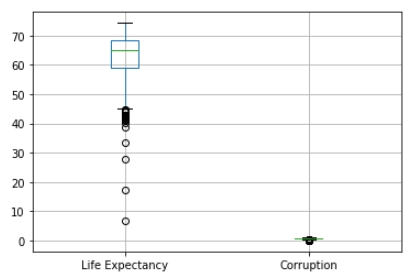

<div class="alert alert-block alert-success"><b>Problem 2 (4 pts.)</b>:
You need to inspect each numeric field for outliers.  Run a set of boxplots for:
    
- Side by side boxplots for all seven happiness measures that have a max under 1.
- Individual boxplots for Life Expectancy and Log GDP
</div>

In [ ]:
#TODO show side by side boxplots of seven measures
 

<div class="alert alert-block alert-success"><b>Problem 2 continued:</b> Create a boxplot for <i>Life Expectancy</i>.</div>

In [ ]:
#TODO: Create a boxplot for Life Expectancy
 

<div class="alert alert-block alert-success"><b>Problem 2 continued:</b> Create a boxplot for <i>Log GDP</i>.</div>

In [ ]:
#TODO: Create a boxplot for Log GDP
 

<div class="alert alert-block alert-success"><b>Problem 3 (2 pts.)</b>:
    
Use a markdown cell to explain what each of the boxplots in Problem 2 shows.
</div>

### Inspection of the `Year` field

We can see below that the earlier years along with 2020 and 2021 have fewer countries represented.  It looks like 2011 through 2019 have a fairly consistent number of countries, but before we decide which years to use, we will investigate the `Year` column.

In [ ]:
# using sort_index puts the order focus on the field and not the count
df['Year'].value_counts().sort_index()

### Investigate one year of data

Below we are creating a new dataframe object with only 2011 data.

In [ ]:
yr2011 = df[df['Year'] == '2011']
yr2011.info()
yr2011.head()

### View the country names for the year 2011

- Think of which names may need correcting - like Hong Kong and Taiwan. Country names will be used later to connect with population data and the country names in both data frames will need to match.
- Inspect to see if there are more than country info included.
- Note  the `pd.options` line which allows you to see all the rows of country names. Once you run this code for a notebook, it is set as long as the notebook is active.

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
#pd.options.display.max_rows = 999

# can only see some of the rows
print(yr2011['Country'])

### pd.options.display - note the output now

When you look at the output in the previous cell, the first five countries are shown and the last five countries are shown; the countries in between are not visible. You can set the number of maximum rows to show with the `pd.options.display` command. In the cell below, the `max_rows` is set to 999 and all countries are displayed.  The setting is now in place for the remaining use of the notebook.

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

# can now see all of the rows
pd.options.display.max_rows = 999
print(yr2011['Country'])

### Investigate the years to determine which should be included in the analysis


In [ ]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']

many_years = df[df['Year'].isin(years)]
many_years.info()

### Missing values

- Any row in the dataframe that does not have 953 non-null rows of data has missing data.
- It is important to consider how a row of data can be recovered if at all possible.
- In some data, there may be columns that can help populate other columns.
  - For example, a missing `Age` value can be calculated from a `Birth_date` column.
- It turns out with the data we are using, there is no way to fill in the gaps from other columns.
- The option for this data is to drop all of the null rows.

In [ ]:
many_years = many_years.dropna(inplace = False)
many_years.info()

### Happiness data by years

From the `value_counts` counts in the cell below, there are between 122 and 128 countries with data for the years of 2015-2019.  But the number of countries drop in 2020 to 99 and in 2021 to 100.

In [ ]:
# look at counts per year without nulls
many_years['Year'].value_counts().sort_index()

### Pandas Crosstab

__[Pandas Crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)__

In [ ]:
# look at Country and year to see what is missing
# margins = True gives a row and column total
cross = pd.crosstab(many_years['Country'],many_years['Year'], margins = True)
cross

### Results of crosstab

A visual inspection of the crosstab does reveal the countries with no data for 2020 and 2021.  There are enough major countries with missing data that it will be better off for our study to omit 2020 and 2021.  The cell below shows the isolation of countries with five or less years of data. 


### Best practice on dataframe names

- As you progress in the EDA process, there will end up being many dataframes created.  A naming convention is a good plan to put into place. Your naming convention should be one that makes sense to you and to anyone that you will share your code with.
- A common mistake made is to use nonmeaningful names like df1, df2, df3, etc. The weakness with this plan is that it is difficult to easily know which is the most current dataframe. 
- A possible convention is to use `df` following by a suffix which denotes where you are in the EDA process.
  - df_raw or dfRaw could be used when you first read in the raw data.
  - df_clean or dfClean could be used after cleaning the data
  - df_final or dfFinal could be used after creating new variables and you are ready to write out your file.
  - There can be a number of additional suffixes that you may end up using.
- Another convention is to use dataframe names that relate to your topic; this is especially useful if you have a number of files.
  - Example: nfl2019, nfl2020, nfl2021 would be good names if you have three years of data that you will later combine.
  - You can use this example and combine it with the suffix idea: nfl2019Raw, nfl2019Clean, nfl2019Final.

<div class="alert alert-block alert-success"><b>Problem 4 (4 pts.)</b>:
    
Create a new dataframe called `happy_final` to include 2015, 2016, 2017, 2018 and 2019 data.  
- Show the shape of your new dataframe.
- Drop all nulls from happy_final.
- Show the shape of the dataframe after the drop. Make sure the number of records have decreased.
</div>

In [ ]:
#TODO: Create dataframe called 'happy_final'
 

In [ ]:
#TODO: Show the shape of happy_final dataframe

#TODO: drop the nulls from happy_final

#TODO: Show the shape of happy_final dataframe
 

### Dataframe names continued

In the cell below there are two new dataframes created, `cross` and `subset`. These names were chosen in such a way that they can be used again and again without the worry that they will interfere with or be overwritten by a dataframe that might be needed later.


In [ ]:
#  what is missing per country
cross = pd.crosstab(happy_final['Country'],happy_final['Year'], margins = True)
type(cross)
subset = cross[cross['All'] < 5]
type(subset)
subset.sort_values(by = 'All')

### Happiness data wrap up

At this point the happiness data is ready to be merged with the population data.  Even though there are some years missing from some of the countries, the merge process will only select those countries and years with both happiness data and population data.

## Part II - Population data

__[Worldbank Data](https://data.worldbank.org/indicator/SP.POP.TOTL)__


 
When you look at the data in the popuation file, you can see that the first row is not the header. 
    
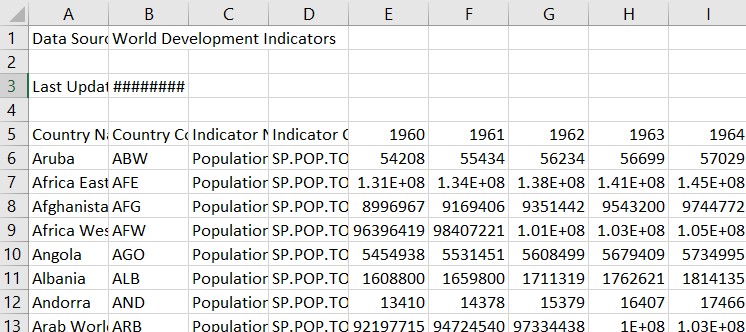


### Big picture plan of merging two dataframes

Our goal is to create one final dataframe that contains data for the happiness measures and population data. Here are some important details to know about merging dataframes.
- You will need common fields in each dataframe to merge on and in our case it is two columns - `Country and Year`.
- For every  `Country+Year` combination, we will have one row of data.
- The merge of data will be an inner join between the two tables so that we end up with both happiness and population data.  If one dataframe has data for the `Country+Year` combination of a row but not the other file, then that data is dropped.
- For example, if there is Population data for Egypt for 2019, but no happiness data, then the Egypt+2019 row of data is dropped completely from our final clean dataframe.

<div class="alert alert-block alert-success"><b>Problem 5 (3 pts.)</b>:
    
Read in csv file that contains the population data. 
- The file name is API_SP.POP.TOTL_DS2_en_csv_v2_4683828.csv. This is the actual name downloaded from the site.
- Call your new dataframe `pop_raw`.
- Make sure you have a proper header.
- Display the first ten records and the info about the file.
</div>

In [ ]:
#TODO: Read in the file
 

#TODO: Display the dataframe info the info about the file
 


<div class="alert alert-block alert-success"><b>Problem 5 continued:</b> Display the first ten records.</div>

In [ ]:
#TODO: Display the first ten records
 

### What if we don't want all of the columns?

One option is to call out the columns you want to keep. In the case of the `Population` data, there are 67 columns and we will keep less than we will would need to delete. In our case, this is the better option

 

In [ ]:
# creating a dataframe by listing what you want to keep
pop = pop_raw[['Country Name','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]
pop.info()
pop.head()

In [ ]:
pop.tail()

### Describe shows results in scientific notation

In [ ]:
pop.describe()

### One way to fix is with `apply` and `lambda`

In [ ]:
# use apply with lambda to format output
pop.describe().apply(lambda s: s.apply('{0:,.0f}'.format))

### What are the large population numbers?

In looking at the large number in the describe function results, are these accurate or dirty data?

- Some rows are legitimate countries and some are regions.
- We don't want regions in our final data, but the good news is that since they are not in the happiness data, they will get dropped during the merge process!

In [ ]:
# what are the big population numbers?
temp = pop[pop['2021'] > 200000000]
temp

### Missing data

The population data has 266 rows of data, yet all of the years only have 264 rows with non null values.  Let's take a look at the nulls.

In [ ]:
# only including five fields for the test inspection
missing = pop[pop['2012'].isnull()][['Country Name','2012','2013','2018','2019']]
missing

In [ ]:
# drop the nulls
pop.shape
pop = pop.dropna()
pop.shape
pop.info()

<div class="alert alert-block alert-success"><b>Problem 6 (3 pts.)</b>:
    
Change all float64 columns in the `pop` dataframe to type 'int64' and display the dataframe info.
</div>

In [ ]:
#TODO: Change all year columns to type 'int64'

#TODO: Display the dataframe info


### Creating a long file from a wide file - use Pandas melt
- `id_vars` are the columns you will keep
- `value_vars` are the columns you will take from wide to long (not used in this example)
- `var_name` is the name of the column that represents what the wide columns represented
- `value_name` is what you will call you value column

__[Pandas melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)__

In [ ]:
# turn from wide file with years as a column header to a long file with year as a row
col = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
pop_long = (pd.melt(pop, id_vars = ['Country Name'], value_vars = col, var_name = 'Year', value_name = 'Population'))
pop_long.info()
pop_long.head()

### The difference between wide and long file 

Depending on the analysis performed on the data, in some cases a `wide` format is needed and in others a `long` format is needed.  
- In the wide example shown here, the year value is the column header and the population are the values in the column.
  - Values do not repeat in the first column.
- In the long example, `Year` and `Population` are headers with the respective values within the columns.
  - Values do repeat in the first column.
  - Many plotting libraries require data in the long format.

<div>
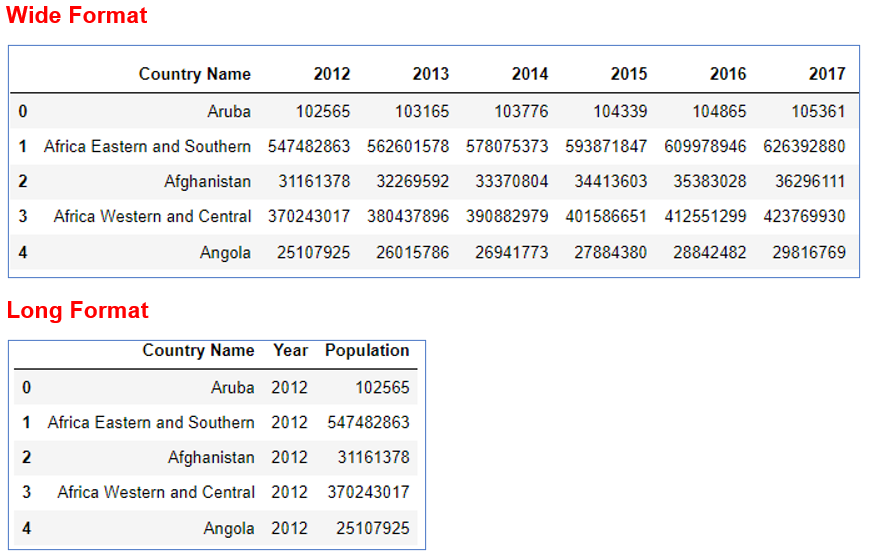
</div>
<br>



In [ ]:
# with a wide file, you need to analyze each column separately
pop['2012'].mean()
pop['2013'].mean()

In [ ]:
# what is the mean population per year. A long file allows for a groupby.
pop_long.groupby('Year')['Population'].mean().map('{0:,.0f}'.format)


In [ ]:
# could make the student do this?
pop_long = pop_long.rename(columns = {'Country Name':'Country'})
pop_long.info()

### Merging two files together

__[Merging Files](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)__

Look at the shape of `happy_final` that has 3 columns and look at `pop_long` which has 12 columns and the final goal will be to get the `Population` column linked up to the correct `Country + Year` combination.

In [ ]:
pop_long.shape
happy_final.shape
pop_long.head()
happy_final.head()

### After the merge

We now have a dataframe with 13 columns. We went from 621 rows of happiness data to 566 rows of merged data.

In [ ]:
merged = pd.merge(happy_final, pop_long, how = 'inner', on = ['Country','Year'])
merged.shape
merged.info()

In [ ]:
# look at the population by year
merged.groupby('Year')['Population'].sum().map('{0:,.0f}'.format)

In [ ]:
# countries per year
merged['Year'].value_counts().sort_index()

### Are all countries complete with five years of data

Not all countries have five years of data.

In [ ]:
# Check countries by years
cross = pd.crosstab(merged['Country'],merged['Year'], margins = True)
cross

In [ ]:
# how many countries have all five years of data
temp = cross[cross['All'] == 5]
len(temp)
temp.sort_values(by = 'All')

### Write out the final file for use in the Module 6 Python Assignment

In [ ]:
merged.to_csv('Happiness_clean.csv', header = True, index = False)

<div class="alert alert-block alert-success"><b>Problem 7 (6 pts.)</b>:
    
Using only 2019 data from the `merged` dataframe, answer the following questions:
- Display the rows corresponding to the five countries with the `highest population`?
- Display the rows corresponding to the five countries with the `highest Log GDP`?
- Explain the results.  How do the two results differ and what can you conclude?
</div>

In [ ]:
#TODO: Create a dataframe for 2019
 

#TODO: Display the dataframe info
 

<div class="alert alert-block alert-success"><b>Problem 7 continued:</b> Display the rows corresponding to the five countries with the `highest population`?</div>

In [ ]:
#TODO: Determine which five countries have the highest population
 

<div class="alert alert-block alert-success"><b>Problem 7 continued:</b> Display the rows corresponding to the five countries with the `highest Log GDP`?.</div>

In [ ]:
#TODO: Determine which five countries have the highest Log GDP
 

<div class="alert alert-block alert-success"><b>Problem 8 (2 pts.)</b>:
    
- Using a Markdown cell, explain the results.  How do the countries with the highest population differ from those with high Log GDP?
</div>